In [ ]:
"""
Task 1: Diseño de Figuras Compuestas con Subplots (10 minutos)
Las visualizaciones efectivas rara vez consisten en un solo gráfico. Los subplots permiten crear dashboards comprehensivos que muestran múltiples perspectivas de los datos simultáneamente.

Arquitecturas de Subplots Comunes
Grid rectangular: Distribución regular de visualizaciones relacionadas.

"""

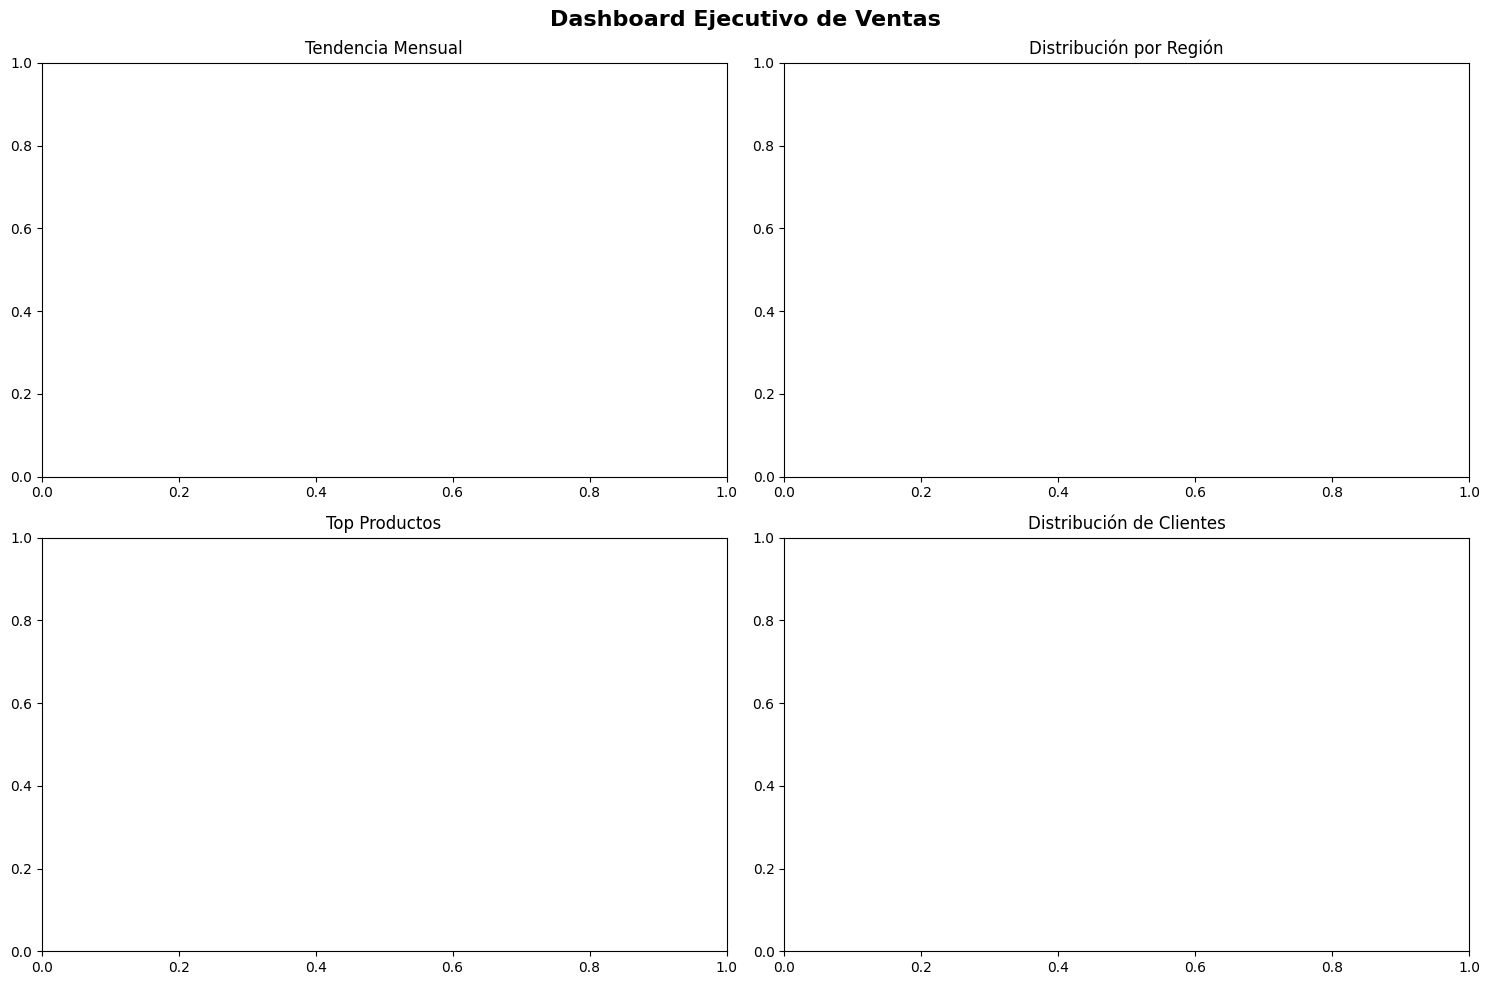

In [2]:
import matplotlib.pyplot as plt
#Grid rectangular: Distribución regular de visualizaciones relacionadas.
# 2x2 grid para análisis multivariado
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Dashboard Ejecutivo de Ventas', fontsize=16, fontweight='bold')

# Asignar visualizaciones específicas
ax1.set_title('Tendencia Mensual')      # Serie temporal
ax2.set_title('Distribución por Región') # Barras
ax3.set_title('Top Productos')          # Barras horizontales
ax4.set_title('Distribución de Clientes') # Pie o barras

plt.tight_layout()

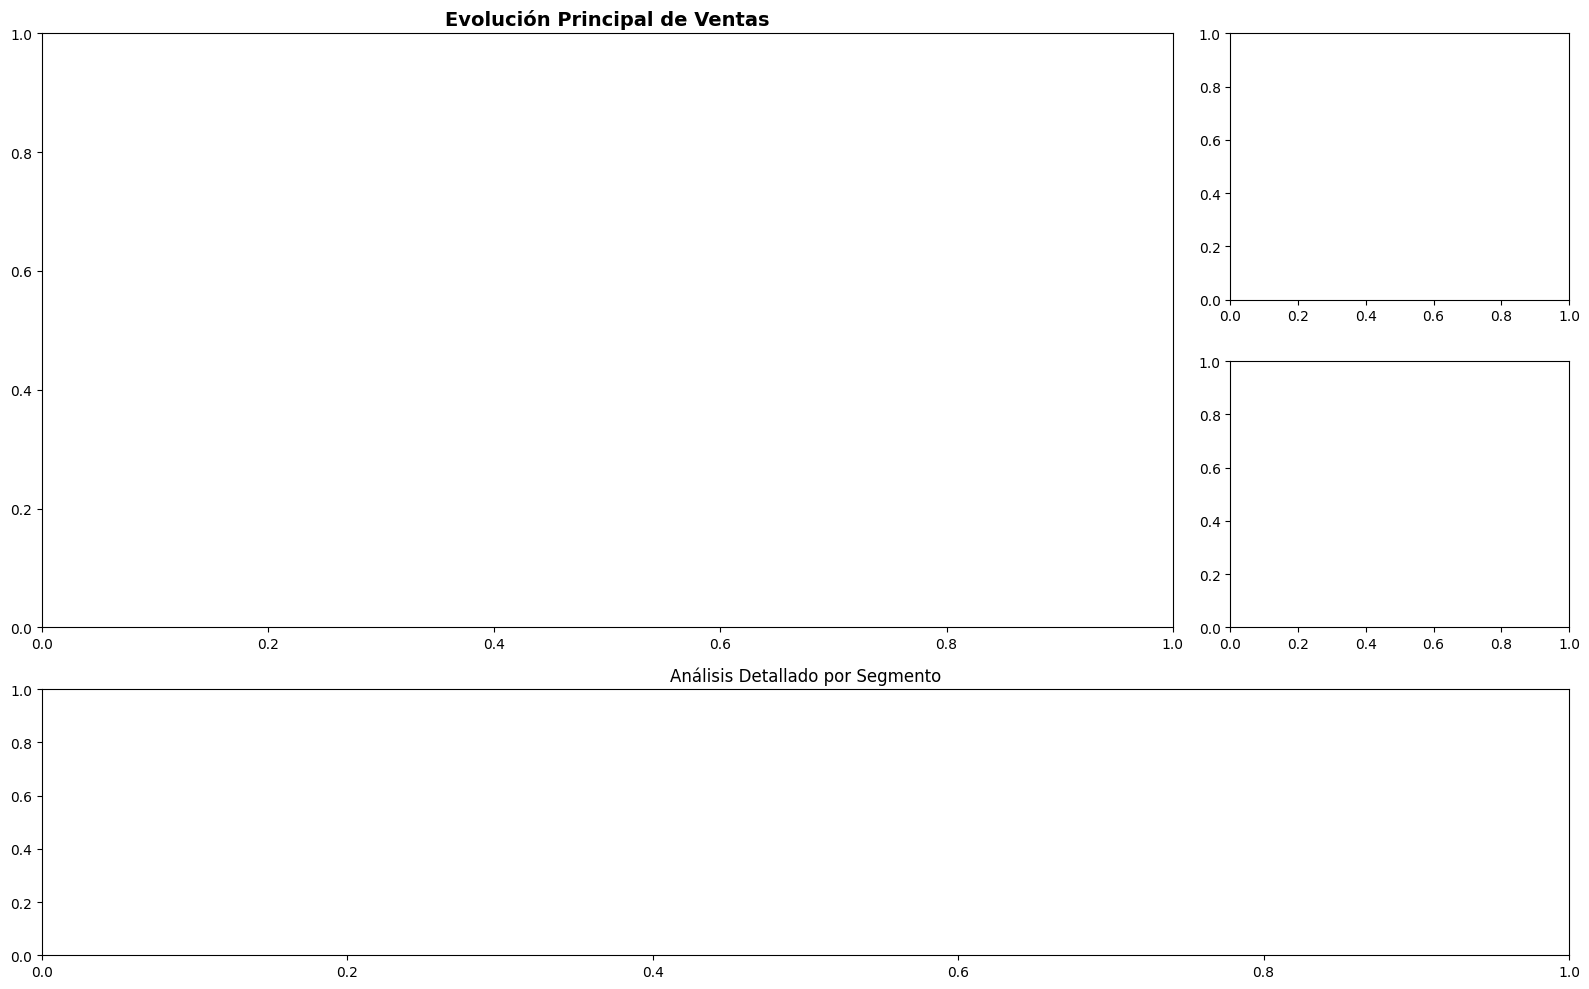

In [3]:
#Layout asimétrico: Distribuciones que enfatizan jerarquía visual.

# Layout con gráfico principal y secundarios
fig = plt.figure(figsize=(16, 10))

# Gráfico principal (70% del espacio)
ax_main = plt.subplot2grid((3, 4), (0, 0), colspan=3, rowspan=2)
ax_main.set_title('Evolución Principal de Ventas', fontsize=14, fontweight='bold')

# Panel derecho con KPIs (30% del espacio)
ax_kpi1 = plt.subplot2grid((3, 4), (0, 3), rowspan=1)
ax_kpi2 = plt.subplot2grid((3, 4), (1, 3), rowspan=1)

# Panel inferior para detalles
ax_detail = plt.subplot2grid((3, 4), (2, 0), colspan=4)
ax_detail.set_title('Análisis Detallado por Segmento', fontsize=12)

plt.tight_layout()

<BarContainer object of 4 artists>

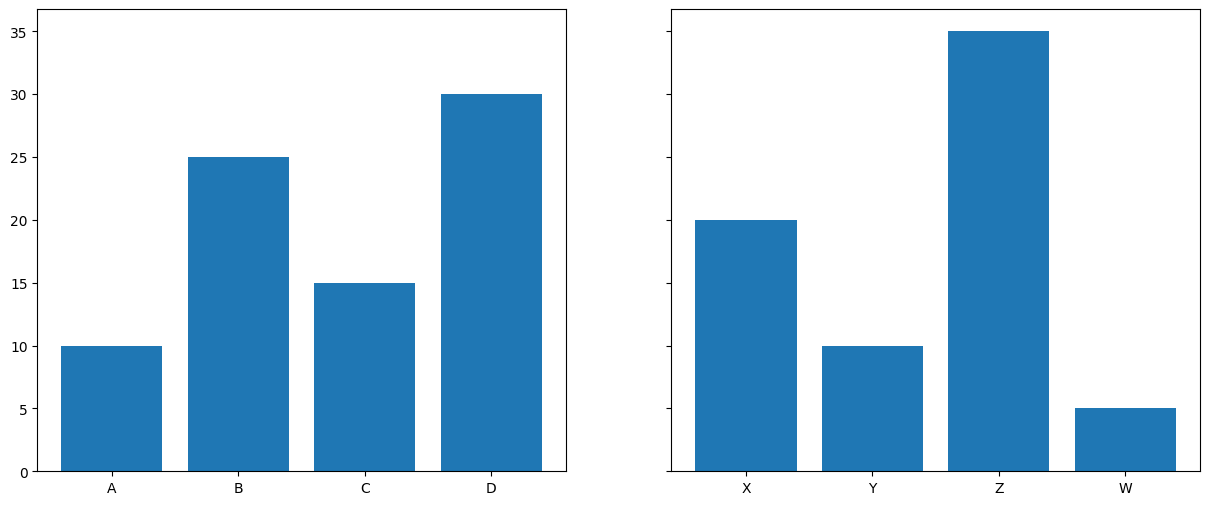

In [5]:
import matplotlib.pyplot as plt
#Escalas compartidas: Mantener consistencia en ejes para comparación.



# Compartir eje Y para comparación directa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Ejemplo de datos (debes reemplazar esto con tus datos reales)
categorias_a = ['A', 'B', 'C', 'D']
valores_a = [10, 25, 15, 30]
categorias_b = ['X', 'Y', 'Z', 'W']
valores_b = [20, 10, 35, 5]

# Ambos gráficos tendrán la misma escala Y
ax1.bar(categorias_a, valores_a)
ax2.bar(categorias_b, valores_b)

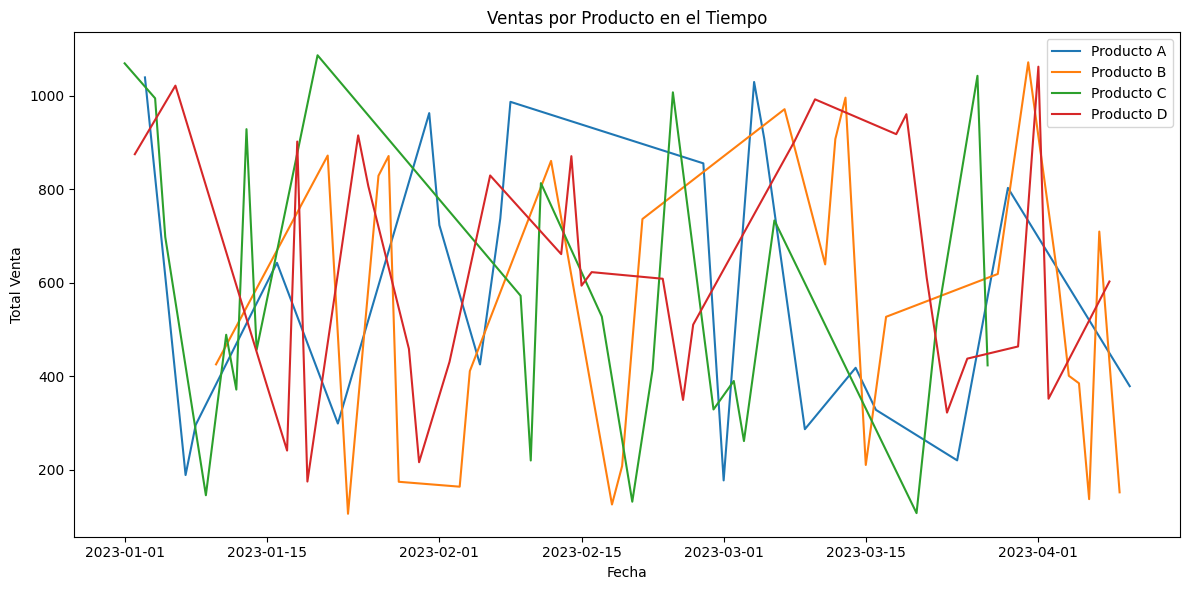

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Mapeo de colores por producto
color_map = {
    'Producto A': '#1f77b4',
    'Producto B': '#ff7f0e',
    'Producto C': '#2ca02c',
    'Producto D': '#d62728'
}

# Crear un DataFrame de ejemplo con datos de ventas para simular el error y su corrección
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
products = np.random.choice(list(color_map.keys()), size=100)
sales = np.random.rand(100) * 1000 + 100 # Random sales between 100 and 1100

df = pd.DataFrame({
    'fecha': dates,
    'producto': products,
    'total_venta': sales
})

# Crear un subplot simple para probar
fig, ax = plt.subplots(figsize=(12,6))

# Recorrer cada producto y graficar su evolución en ventas
for producto, color in color_map.items():
    datos = df[df['producto'] == producto].sort_values('fecha')
    ax.plot(datos['fecha'], datos['total_venta'],
            label=producto, color=color)

ax.set_title("Ventas por Producto en el Tiempo")
ax.set_xlabel("Fecha")
ax.set_ylabel("Total Venta")
ax.legend()
plt.tight_layout()
plt.show()

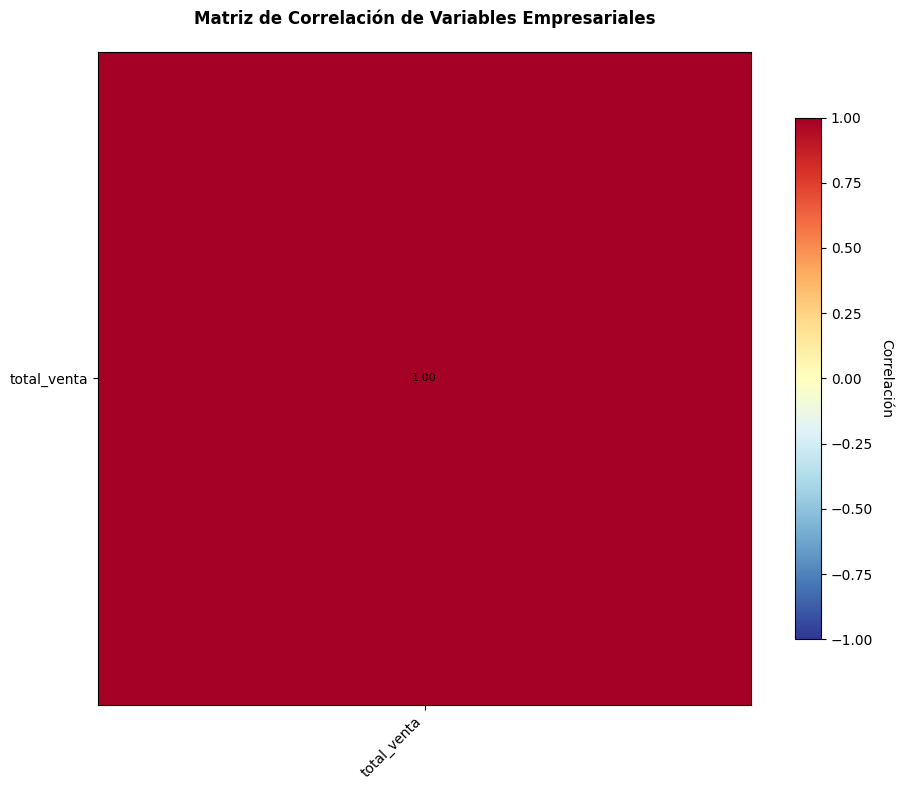

In [12]:
#Los heatmaps usan color para representar valores en matrices bidimensionales, ideales para correlaciones y patrones complejos.

# Matriz de correlación completa
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Heatmap de correlaciones
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_matrix, cmap='RdYlBu_r', vmin=-1, vmax=1)

# Configurar ejes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)

# Añadir valores numéricos
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                      ha='center', va='center', color='black', fontsize=8)

# Barra de color
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
cbar.ax.set_ylabel('Correlación', rotation=-90, va='bottom')

ax.set_title('Matriz de Correlación de Variables Empresariales', fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('heatmap_correlaciones.png', dpi=300, bbox_inches='tight')

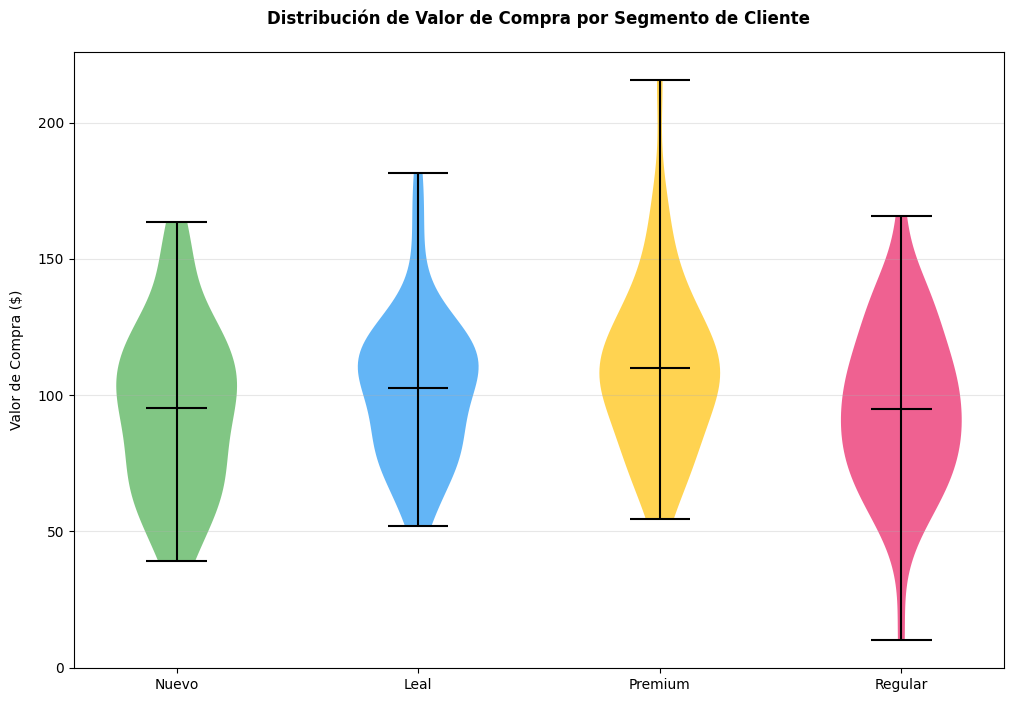

In [14]:
#Los violin plots combinan box plots con estimaciones de densidad kernel, mostrando forma completa de distribuciones.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo para simular datos de cliente y compra
np.random.seed(42)
n_samples = 200
segmentos_posibles = ['Premium', 'Regular', 'Nuevo', 'Leal']
data = {
    'segmento_cliente': np.random.choice(segmentos_posibles, n_samples),
    'valor_compra': np.random.normal(loc=100, scale=30, size=n_samples)
}
df = pd.DataFrame(data)

# Asegurar que los valores de compra sean positivos
df['valor_compra'] = df['valor_compra'].apply(lambda x: max(x, 10)) # Mínimo 10

# Definir colores para los segmentos
colores = ['#4CAF50', '#2196F3', '#FFC107', '#E91E63']

# Comparación de distribuciones por categoría
fig, ax = plt.subplots(figsize=(12, 8))

# Datos por segmento de cliente
segmentos = df['segmento_cliente'].unique()
data_por_segmento = [df[df['segmento_cliente'] == seg]['valor_compra']
                    for seg in segmentos]

# Violin plot
parts = ax.violinplot(data_por_segmento, showmeans=True, showextrema=True)

# Personalización
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colores[i % len(colores)])
    pc.set_alpha(0.7)

# Configurar partes del violin plot
parts['cmeans'].set_color('black')
parts['cmins'].set_color('black')
parts['cmaxes'].set_color('black')
parts['cbars'].set_color('black')

# Etiquetas y título
ax.set_xticks(range(1, len(segmentos) + 1))
ax.set_xticklabels(segmentos)
ax.set_title('Distribución de Valor de Compra por Segmento de Cliente',
             fontweight='bold', pad=20)
ax.set_ylabel('Valor de Compra ($)', labelpad=10)
ax.grid(True, alpha=0.3, axis='y')

plt.savefig('violin_segmentos_cliente.png', dpi=300, bbox_inches='tight')
plt.show()

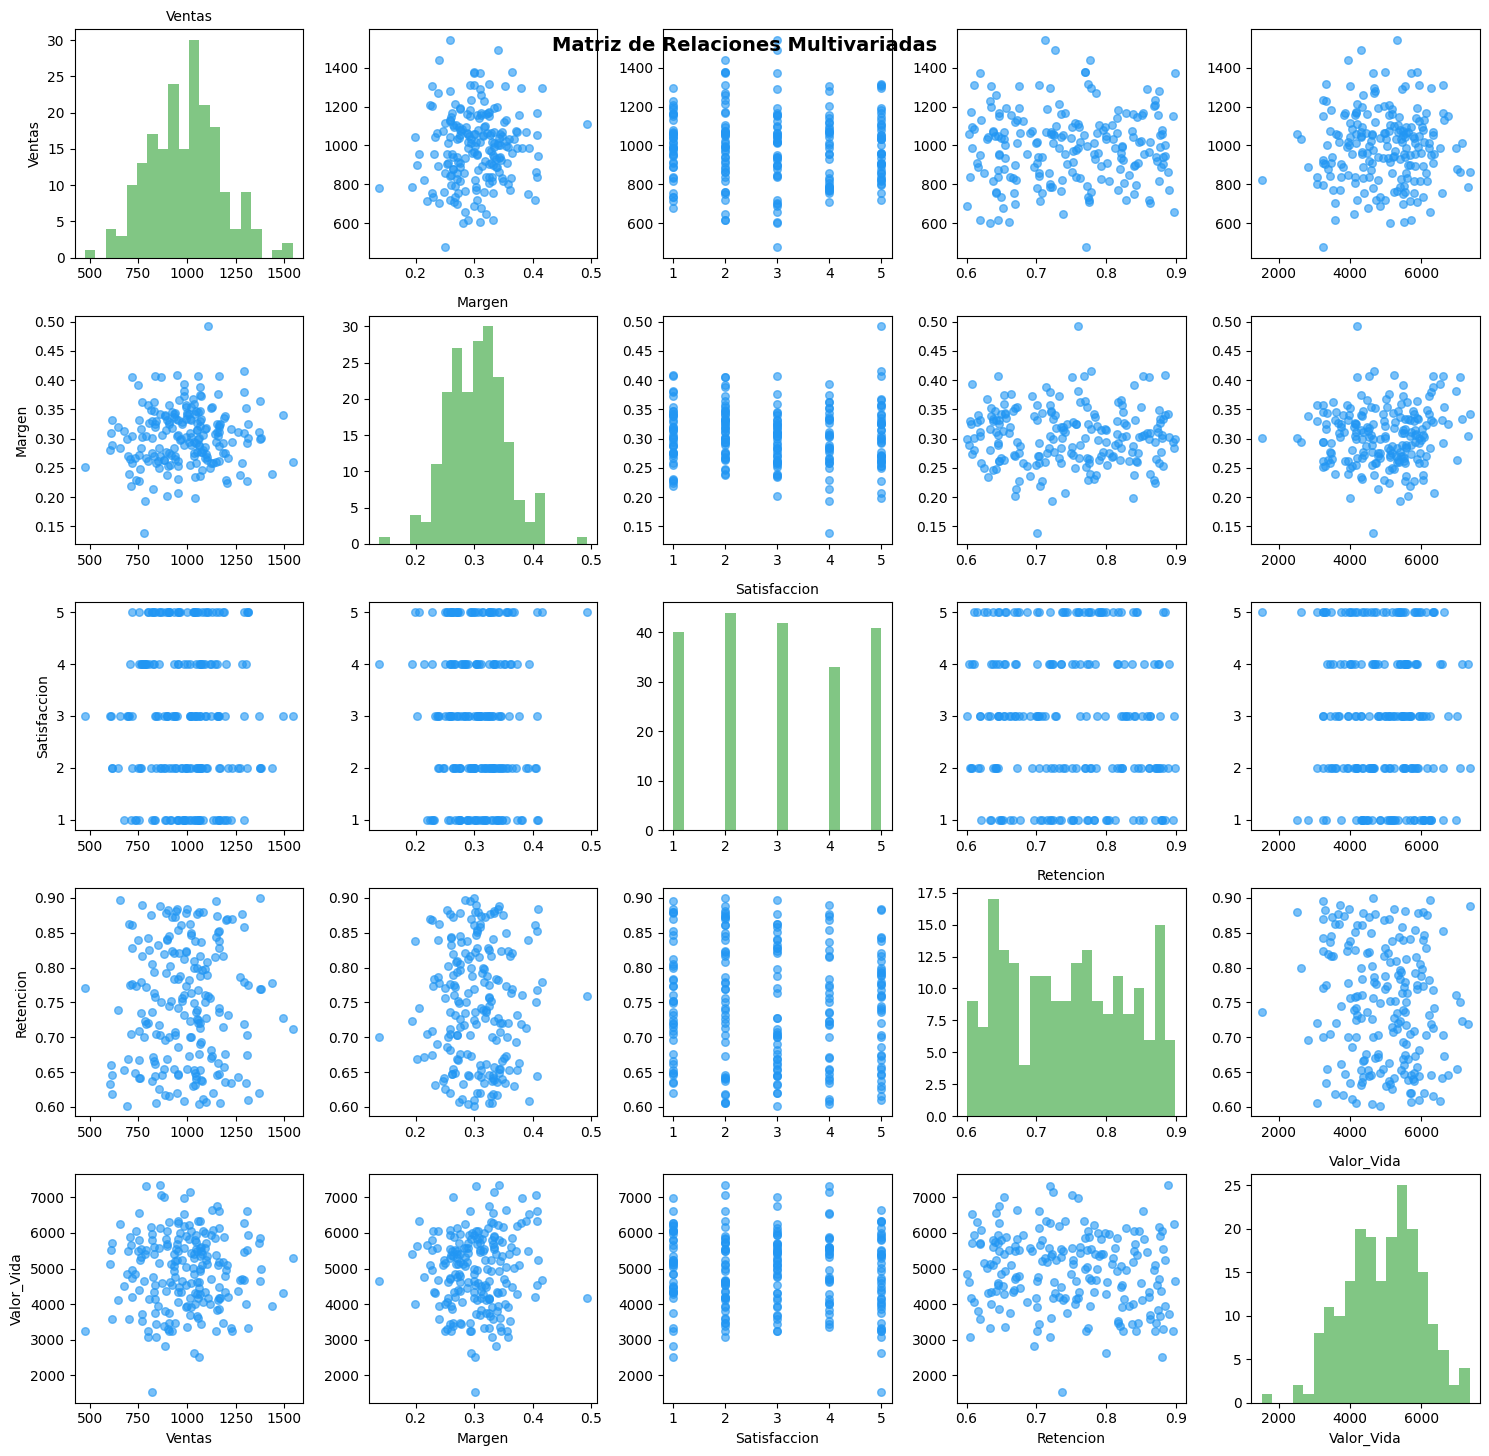

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con las variables clave
np.random.seed(42)
n_samples = 200
data = {
    'ventas': np.random.normal(loc=1000, scale=200, size=n_samples),
    'margen': np.random.normal(loc=0.3, scale=0.05, size=n_samples),
    'satisfaccion': np.random.randint(1, 6, size=n_samples),
    'retencion': np.random.uniform(0.6, 0.9, size=n_samples),
    'valor_vida': np.random.normal(loc=5000, scale=1000, size=n_samples)
}
df = pd.DataFrame(data)

# Asegurar que 'margen' esté en un rango razonable
df['margen'] = df['margen'].clip(0.1, 0.5)

# Definir colores (usando los mismos de ejemplos anteriores si se quiere consistencia o definir nuevos)
colores = ['#4CAF50', '#2196F3'] # Solo se necesitan 2 colores para este ejemplo (hist y scatter)

# Variables de interés para análisis multivariado
variables_clave = ['ventas', 'margen', 'satisfaccion', 'retencion', 'valor_vida']

# Crear scatter plot matrix
n_vars = len(variables_clave)
fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 15))

for i in range(n_vars):
    for j in range(n_vars):
        ax = axes[i, j]

        if i == j:
            # Diagonal: histogramas
            ax.hist(df[variables_clave[i]], bins=20, alpha=0.7, color=colores[0])
            ax.set_title(f'{variables_clave[i].title()}', fontsize=10)
        else:
            # Off-diagonal: scatter plots
            ax.scatter(df[variables_clave[j]], df[variables_clave[i]],
                      alpha=0.6, s=30, color=colores[1])

            # Añadir línea de tendencia si correlación fuerte
            corr = df[variables_clave[j]].corr(df[variables_clave[i]])
            if abs(corr) > 0.5:
                z = np.polyfit(df[variables_clave[j]], df[variables_clave[i]], 1)
                p = np.poly1d(z)
                x_trend = np.linspace(df[variables_clave[j]].min(), df[variables_clave[j]].max(), 50)
                ax.plot(x_trend, p(x_trend), 'r--', alpha=0.8, linewidth=1)

# Configurar etiquetas
for i, var in enumerate(variables_clave):
    axes[-1, i].set_xlabel(var.title(), fontsize=10)
    axes[i, 0].set_ylabel(var.title(), fontsize=10)

plt.suptitle('Matriz de Relaciones Multivariadas', fontsize=14, fontweight='bold', y=0.95)
plt.tight_layout()
plt.savefig('scatter_matrix_multivariada.png', dpi=300, bbox_inches='tight')

In [22]:
!pip install ipympl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.8/515.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.9 MB/s eta 0:00:00


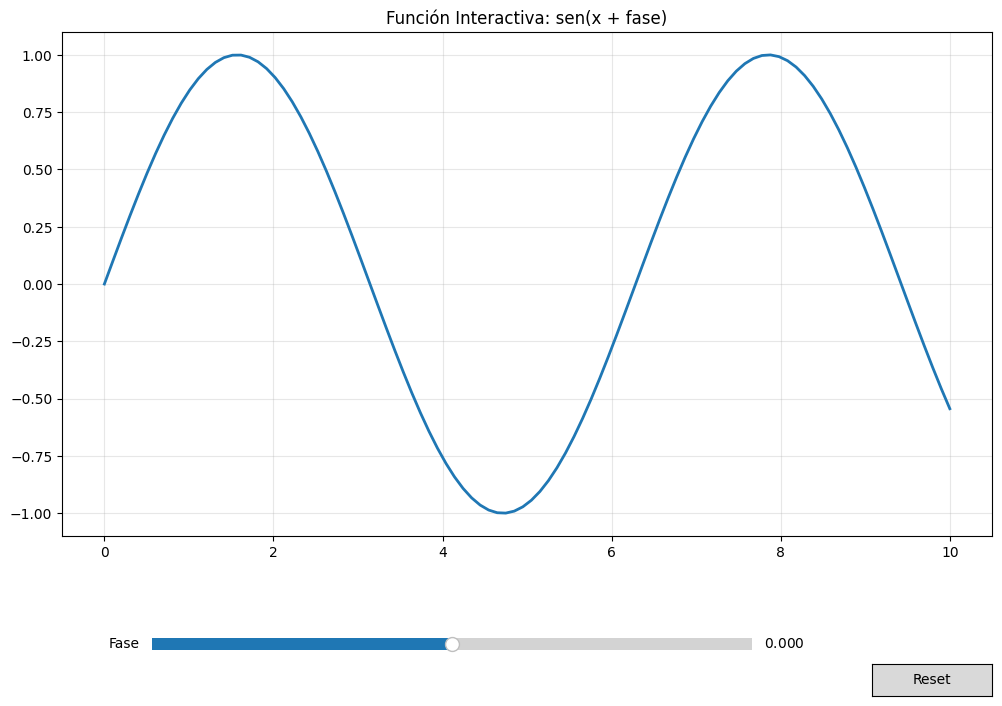

In [25]:
%matplotlib inline
from matplotlib.widgets import Slider, Button
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(bottom=0.25)

x = np.linspace(0, 10, 100)
line, = ax.plot(x, np.sin(x), linewidth=2)
ax.set_title('Función Interactiva: sen(x + fase)')
ax.grid(True, alpha=0.3)

# The slider and button widgets will not be functional in the 'inline' backend.
# They are kept in the code to show the original intent, but won't appear or work.
ax_phase = plt.axes([0.2, 0.1, 0.5, 0.03])
slider_phase = Slider(ax_phase, 'Fase', -np.pi, np.pi, valinit=0)

def update(val):
    phase = slider_phase.val
    line.set_ydata(np.sin(x + phase))
    fig.canvas.draw_idle()

slider_phase.on_changed(update)

ax_reset = plt.axes([0.8, 0.05, 0.1, 0.04])
button_reset = Button(ax_reset, 'Reset')

def reset(event):
    slider_phase.set_val(0)
button_reset.on_clicked(reset)

plt.show()

In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con datos relevantes para el dashboard
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
regions = np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], size=100)
products = np.random.choice(['Producto A', 'Producto B', 'Producto C', 'Producto D'], size=100)
clients = np.random.choice([f'Cliente {i}' for i in range(1, 21)], size=100)
sales = np.random.rand(100) * 1000 + 100 # Random sales between 100 and 1100

df = pd.DataFrame({
    'fecha': dates,
    'region': regions,
    'producto': products,
    'cliente': clients,
    'total_venta': sales
})

# Definir colores para las visualizaciones (usando un subset o adaptando los anteriores)
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear subplot interactivo
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Ventas por Región', 'Tendencia Temporal',
                   'Distribución por Producto', 'Top Clientes'),
    specs=[[{'type': 'bar'}, {'type': 'scatter'}],
           [{'type': 'pie'}, {'type': 'bar'}]]
)

# Gráfico 1: Barras de ventas por región
ventas_region = df.groupby('region')['total_venta'].sum()
fig.add_trace(
    go.Bar(x=ventas_region.index, y=ventas_region.values,
           name='Ventas por Región', marker_color=colores[0]),
    row=1, col=1
)

# Gráfico 2: Tendencia temporal
ventas_tiempo = df.groupby('fecha')['total_venta'].sum().reset_index()
fig.add_trace(
    go.Scatter(x=ventas_tiempo['fecha'], y=ventas_tiempo['total_venta'],
              mode='lines+markers', name='Evolución de Ventas',
              line=dict(color=colores[1], width=3)),
    row=1, col=2
)

# Gráfico 3: Pie chart de productos
ventas_producto = df.groupby('producto')['total_venta'].sum()
fig.add_trace(
    go.Pie(labels=ventas_producto.index, values=ventas_producto.values,
           name='Distribución por Producto'),
    row=2, col=1
)

# Gráfico 4: Top clientes
top_clientes = df.groupby('cliente')['total_venta'].sum().nlargest(10)
fig.add_trace(
    go.Bar(x=top_clientes.values, y=top_clientes.index, orientation='h',
           name='Top 10 Clientes', marker_color=colores[3]),
    row=2, col=2
)

# Configurar layout
fig.update_layout(
    title_text='Dashboard Interactivo de Ventas Empresariales',
    title_font_size=20,
    showlegend=False,
    height=800
)

# Guardar como HTML interactivo
fig.write_html('dashboard_interactivo.html')
print("Dashboard interactivo guardado como 'dashboard_interactivo.html'")

Dashboard interactivo guardado como 'dashboard_interactivo.html'


In [28]:
from google.colab import files
files.download('dashboard_interactivo.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>